In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

In [188]:
train_data_pri = pd.read_csv('./data/private_train.csv')
test_data_pri = pd.read_csv('./data/private_test.csv')
train_data_pri_p = pd.read_csv('private_train_2.csv')

In [189]:
train_data_pri = train_data_pri.drop(['index'],axis=1)
test_data_pri = test_data_pri.drop(['index'],axis=1)
print train_data_pri.shape
print train_data_pri_p.shape
print test_data_pri.shape
print "List of Columns:\n", ", ".join(train_data_pri.columns), "\n\n"
print "List of Columns:\n", ", ".join(test_data_pri.columns), "\n\n"

(457300, 20)
(457288, 21)
(4033, 19)
List of Columns:
project_name, address, floor_area_sqm, type_of_land, price, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 


List of Columns:
project_name, address, floor_area_sqm, type_of_land, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 




In [190]:
test_data_pri[test_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Series([], Name: completion_date, dtype: int64)

In [191]:
train_data_pri[train_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Uncompleted    154395
Name: completion_date, dtype: int64

In [192]:
test_data_pri.completion_date.unique()

array(['2014', '1995', '1979', '2015', '2016', '1992', '1998', '1986',
       '2011', '2010', '2000', '2012', '2001', '1999', '1968', '2004',
       '2006', 'Unknown', '2005', '2009', '1975', '2013', '1996', '1997',
       '1991', '1994', '2002', '1982', '2008', '2007', '1987', '1978',
       '1983', '1984', '1972', '1990', '1993', '1971', '2003', '1969',
       '1985', '1989', '2017', '1980', '1976', '1956', '1988', '1967',
       '1958', '1957', '1955', '1977', '1960', '1966', '1965', '1961',
       '1974', '1953', '1941', '1970', '1981', '1950', '1963', '1962'], dtype=object)

In [193]:
train_data_pri.completion_date.unique()

array(['2001', 'Uncompleted', '2004', '1995', '1994', 'Unknown', '2009',
       '1972', '1999', '1993', '2007', '2008', '1992', '2002', '2000',
       '1997', '2003', '2005', '1984', '2010', '1980', '1981', '1996',
       '1985', '1978', '1998', '1975', '1988', '1990', '2006', '1986',
       '1973', '1976', '1991', '1955', '1983', '1967', '1956', '1963',
       '1987', '1960', '1977', '1964', '1974', '1968', '1962', '1971',
       '1982', '1989', '1979', '1965', '1949', '1952', '1970', '1953',
       '1958', '1939', '1951', '1957', '1931', '1941', '1966', '2011',
       '1940', '1969', '1954', '1950', '1934', '1961', '1930', '1929',
       '2012', '1937', '1959', '1938', '2013', '2014', '3/9/2009',
       '3/25/2014', '4/28/2005', '9/30/2009', '6/19/2013', '9/1/2003',
       '3/1/1986', '4/1/2002', '9/1/1980', '8/15/2012', '2/2/2006',
       '6/28/2013', '4/1/2004', '4/1/1996', '8/31/2009', '12/1/1972',
       '6/26/2008', '12/5/2011', '7/1/1991', '7/2/2010', '4/1/2011',
       '10/23/

In [194]:
test_data_pri.type_of_land.unique()

array(['Strata', 'Land'], dtype=object)

In [195]:
train_data_pri.type_of_land.unique()

array(['Strata', 'Land', 'Unknown'], dtype=object)

In [196]:
test_data_pri[test_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Series([], Name: type_of_land, dtype: int64)

In [197]:
train_data_pri[train_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Unknown    928
Name: type_of_land, dtype: int64

In [198]:
train_data_pri.contract_date.unique()

array(['01-Jan-2010', '02-Jan-2010', '03-Jan-2010', ..., '3-Aug-2017',
       '2-Aug-2017', '1-Aug-2017'], dtype=object)

In [199]:
test_data_pri.contract_date.unique()

array(['29-Sep-2017', '28-Sep-2017', '27-Sep-2017', '26-Sep-2017',
       '25-Sep-2017', '22-Sep-2017', '21-Sep-2017', '20-Sep-2017',
       '19-Sep-2017', '18-Sep-2017', '15-Sep-2017', '14-Sep-2017',
       '13-Sep-2017', '12-Sep-2017', '11-Sep-2017', '8-Sep-2017',
       '7-Sep-2017', '6-Sep-2017', '5-Sep-2017', '4-Sep-2017',
       '08-SEP-2017', '07-SEP-2017', '06-SEP-2017', '05-SEP-2017',
       '04-SEP-2017', '22-SEP-2017', '21-SEP-2017', '20-SEP-2017',
       '19-SEP-2017', '18-SEP-2017', '15-SEP-2017', '14-SEP-2017',
       '13-SEP-2017', '12-SEP-2017', '11-SEP-2017', '09-SEP-2017',
       '05-OCT-2017', '04-OCT-2017', '03-OCT-2017', '02-OCT-2017',
       '29-SEP-2017', '28-SEP-2017', '27-SEP-2017', '26-SEP-2017',
       '25-SEP-2017', '23-SEP-2017', '19-OCT-2017', '18-OCT-2017',
       '17-OCT-2017', '16-OCT-2017', '13-OCT-2017', '12-OCT-2017',
       '11-OCT-2017', '10-OCT-2017', '09-OCT-2017', '06-OCT-2017',
       '01-NOV-2017', '31-OCT-2017', '30-OCT-2017', '29-OCT-2017',


In [200]:
train_data_pri.month.unique()

array(['2010-1', '2010-2', '2010-3', '2010-4', '2010-5', '2010-6',
       '2010-7', '2010-8', '2010-9', '2010-10', '2010-11', '2010-12',
       '2011-1', '2011-2', '2011-3', '2011-4', '2011-5', '2011-6',
       '2011-7', '2011-8', '2011-9', '2011-10', '2011-11', '2011-12',
       '2012-1', '2012-2', '2012-3', '2012-4', '2012-5', '2012-6',
       '2012-7', '2012-8', '2012-9', '2012-10', '2012-11', '2012-12',
       '2013-1', '2013-2', '2013-3', '2013-4', '2013-5', '2013-6',
       '2013-7', '2013-8', '2013-9', '2013-10', '2013-11', '2013-12',
       '2014-1', '2014-2', '2014-3', '2014-4', '2014-5', '2014-6',
       '2014-7', '2014-8', '2014-9', '2014-10', '2014-11', '2014-12',
       '2015-1', '2015-2', '2015-3', '2015-4', '2015-5', '2015-6',
       '2015-7', '2015-8', '2015-9', '2015-10', '2015-11', '2015-12',
       '2016-1', '2016-2', '2016-3', '2016-4', '2016-5', '2016-6',
       '2016-7', '2016-8', '2016-9', '2016-10', '2016-11', '2016-12',
       '2017-1', '2017-2', '2017-3', '201

In [201]:
train_data_pri.property_type.unique()

array(['Condominium', 'Semi-Detached House', 'Apartment',
       'Executive Condominium', 'Terrace House', 'Detached House'], dtype=object)

In [202]:
test_data_pri.property_type.unique()

array(['Condominium', 'Apartment', 'Terrace House', 'Semi-Detached House',
       'Detached House', 'Executive Condominium'], dtype=object)

In [203]:
train_data_pri.tenure.unique()

array(['99 Yrs From 25/02/1998', '103 Yrs From 18/08/2009',
       '99 Yrs From 16/08/1999', 'Freehold', '99 Yrs From 18/11/1991',
       '99 Yrs From 01/09/1991', '99 Yrs From 25/03/1968',
       '99 Yrs From 14/11/1996', '99 Yrs From 29/01/2002',
       '999 Yrs From 12/10/1885', '99 Yrs From 22/09/1997',
       '99 Yrs From 29/11/2000', '999 Yrs From 01/06/1885',
       '99 Yrs From 17/03/1997', '99 Yrs From 24/04/1996',
       '99 Yrs From 12/08/2002', '929 Yrs From 01/01/1953',
       '9999 Yrs From 01/01/1957', '99 Yrs From 12/09/2000',
       '99 Yrs From 20/06/2000', '999 Yrs From 01/09/1876',
       '99 Yrs From 17/08/1979', '99 Yrs From 12/08/1996',
       '99 Yrs From 08/03/2007', '99 Yrs From 30/08/1976',
       '999 Yrs From 01/01/1879', '99 Yrs From 31/12/2007',
       '99 Yrs From 18/07/1997', '99 Yrs From 31/05/1993',
       '99 Yrs From 06/12/1997', '99 Yrs From 23/06/1995',
       '99 Yrs From 11/09/2007', '99 Yrs From 01/03/1995',
       '99 Yrs From 01/12/1991', '99

In [204]:
test_data_pri.tenure.unique()

array(['99 Yrs From 08/04/2010', 'Freehold', '99 Yrs From 20/10/2010',
       '999 Yrs From 21/06/1877', '99 Yrs From 01/03/1991',
       '999 Yrs From 01/01/1954', '99 Yrs From 07/12/2011',
       '99 Yrs From 26/06/1996', '99 Yrs From 17/03/1982',
       '99 Yrs From 10/09/2007', '99 Yrs From 12/08/1996',
       '99 Yrs From 24/06/1995', '99 Yrs From 24/04/1996',
       '99 Yrs From 26/02/2007', '99 Yrs From 31/12/2007',
       '99 Yrs From 16/08/1999', '99 Yrs From 15/03/2006',
       '99 Yrs From 20/01/2004', '99 Yrs From 07/01/2008',
       '99 Yrs From 10/08/2011', '999 Yrs From 01/05/1874',
       '99 Yrs From 07/06/2011', '99 Yrs From 06/01/2010',
       '99 Yrs From 08/03/1982', '99 Yrs From 16/06/2010',
       '99 Yrs From 20/10/1993', '99 Yrs From 17/03/1997',
       '99 Yrs From 11/07/2011', '103 Yrs From 18/08/2009',
       '99 Yrs From 11/12/2007', '99 Yrs From 30/05/2011',
       '999 Yrs From 01/01/1955', '99 Yrs From 16/02/1998',
       '99 Yrs From 21/06/2001', '99 Yr

In [205]:
train_data_pri.type_of_sale.unique()

array(['Resale', 'New Sale', 'Sub Sale'], dtype=object)

In [206]:
test_data_pri.type_of_sale.unique()

array(['Resale'], dtype=object)

In [207]:
train_data_pri.groupby(['type_of_sale'])['price'].count()

type_of_sale
New Sale    216274
Resale      204797
Sub Sale     36229
Name: price, dtype: int64

In [208]:
train_data_pri.postal_district.unique()

array([27, 15,  4, 19, 21, 16, 11,  1, 18, 12,  2,  8, 20, 23, 25, 10, 17,
        9, 28,  5, 14,  3, 22, 26, 13,  7,  6])

In [209]:
train_data_pri.postal_sector.unique()

array([75, 43,  9, 55, 59, 76, 46, 30,  5, 52, 32,  7, 20, 42, 57, 21, 66,
       73, 25, 50, 53,  1, 23, 27, 65, 54, 68, 80, 58, 12, 41, 16, 24, 48,
       39, 64, 60, 51, 26, 44, 78, 47, 67, 14, 35, 79, 15, 10, 45, 28, 40,
       38, 11, 13,  8, 56, 36, 31, 22, 29, 34,  6, 19, 77, 82, 18, 61, 17,
       63, 33, 49, 37,  4])

In [210]:
train_data_pri.postal_code.unique()

array([759151, 439893,  98656, ..., 466793, 266178, 266180])

In [211]:
train_data_pri.region.unique()

array(['North Region', 'Central Region', 'North East Region',
       'East Region', 'West Region'], dtype=object)

In [212]:
train_data_pri.area.unique()

array(['Mandai', 'Marine Parade', 'Bukit Merah', 'Serangoon',
       'Bukit Timah', 'Yishun', 'Bedok', 'Novena', 'Outram', 'Tampines',
       'Downtown Core', 'Kallang', 'Bishan', 'Bukit Batok', 'Woodlands',
       'Tanglin', 'Pasir Ris', 'Hougang', 'Singapore River',
       'River Valley', 'Choa Chu Kang', 'Clementi', 'Orchard', 'Geylang',
       'Jurong West', 'Newton', 'Jurong East', 'Sengkang', 'Sembawang',
       'Ang Mo Kio', 'Bukit Panjang', 'Queenstown', 'Toa Payoh', 'Museum',
       'Southern Islands', 'Rochor', 'Punggol', 'Sungei Kadut', 'Changi  ',
       'Paya Lebar'], dtype=object)

In [213]:
test_data_pri.area.unique()

array(['Bukit Timah', 'Kallang', 'Serangoon', 'Pasir Ris', 'Tanglin',
       'Yishun', 'Hougang', 'Woodlands', 'Bedok', 'Bishan', 'Queenstown',
       'Geylang', 'Bukit Merah', 'River Valley', 'Novena', 'Newton',
       'Punggol', 'Singapore River', 'Tampines', 'Marine Parade',
       'Ang Mo Kio', 'Choa Chu Kang', 'Bukit Batok', 'Museum', 'Sembawang',
       'Downtown Core', 'Jurong East', 'Toa Payoh', 'Rochor',
       'Southern Islands', 'Bukit Panjang', 'Sengkang', 'Clementi',
       'Jurong West', 'Outram', 'Orchard', 'Mandai', 'Changi  '], dtype=object)

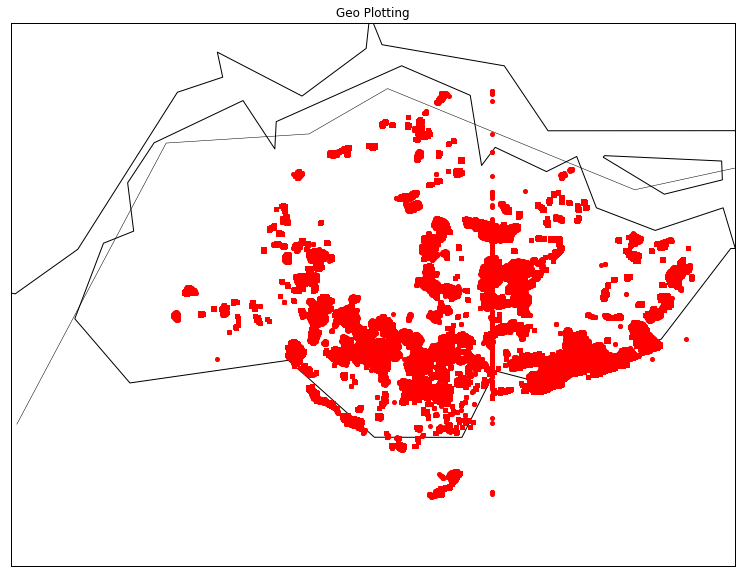

In [214]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
latlong = train_data_pri[cols]

#latlong = latlong.drop(latlong[(latlong.latitude>1.4) & (latlong.latitude<1.6) & (latlong.longitude>103.6) & (latlong.longitude<103.72)].index)
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
#m = Basemap(projection='merc',llcrnrlat=1.4,urcrnrlat=1.6,
 #           llcrnrlon=103.6, urcrnrlon=103.72, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,\
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
 
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = latlong['longitude'].values
lats = latlong['latitude'].values
x,y = m(lons, lats)
#x,y=m([103.714098,103.714216],[1.348241,1.347004])

 

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()

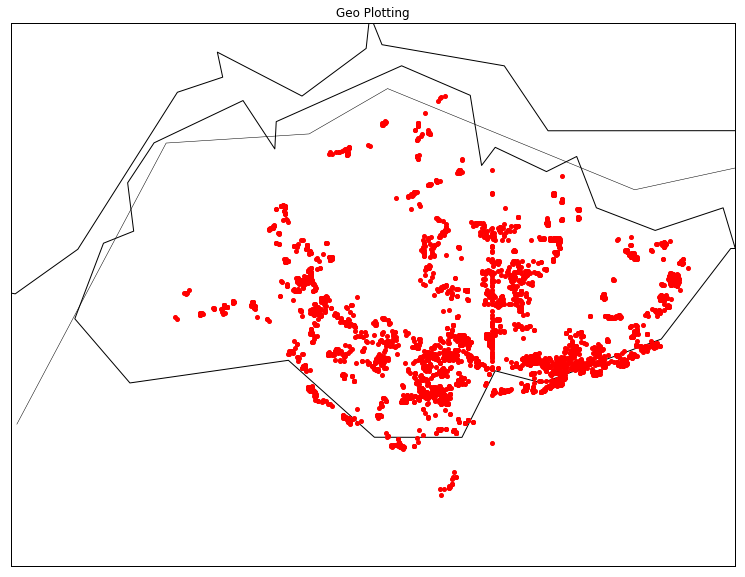

In [215]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
#latlong = train_data_hdb[cols]
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.5, lon_0=103)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = test_data_pri['longitude'].values
lats = test_data_pri['latitude'].values
x,y = m(lons, lats)

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()


 mu = 1328444.13 and sigma = 1505682.41



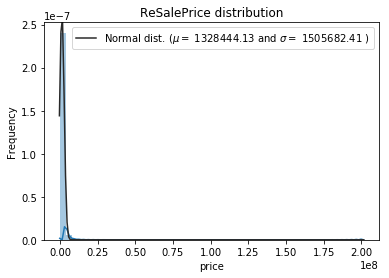

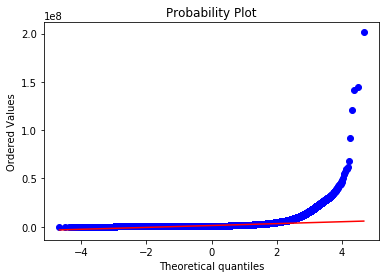

Skewness: 18.042802
Kurtosis: 1275.152772


In [216]:
sns.distplot(train_data_pri['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_pri['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_pri['price'], plot=plt)
plt.show()

print("Skewness: %f" % train_data_pri['price'].skew())
print("Kurtosis: %f" % train_data_pri['price'].kurt())

In [217]:
train_data_pri['price'].describe()

count    4.573000e+05
mean     1.328444e+06
std      1.505684e+06
min      1.200000e+01
25%      7.150000e+05
50%      9.600000e+05
75%      1.420000e+06
max      2.013394e+08
Name: price, dtype: float64

In [218]:
ntrain = train_data_pri.shape[0]
ntest = test_data_pri.shape[0]
y_train = train_data_pri.price.values
all_data = pd.concat((train_data_pri, test_data_pri)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (461333, 19)


In [219]:
all_data.head()

,address,area,completion_date,contract_date,floor_area_sqm,floor_num,latitude,longitude,month,postal_code,postal_district,postal_sector,project_name,property_type,region,tenure,type_of_land,type_of_sale,unit_num
0,5 Jalan Mata Ayer #01-25,Mandai,2001,01-Jan-2010,95,1.0,1.424622,103.824894,2010-1,759151,27,75,EUPHONY GARDENS,Condominium,North Region,99 Yrs From 25/02/1998,Strata,Resale,25.0
1,81 Amber Road #16-06,Marine Parade,Uncompleted,01-Jan-2010,83,16.0,1.302808,103.900986,2010-1,439893,15,43,THE SHORE RESIDENCES,Condominium,Central Region,103 Yrs From 18/08/2009,Strata,New Sale,6.0
2,42 Keppel Bay Drive #01-111,Bukit Merah,2004,02-Jan-2010,138,1.0,1.266812,103.814504,2010-1,98656,4,9,CARIBBEAN AT KEPPEL BAY,Condominium,Central Region,99 Yrs From 16/08/1999,Strata,Resale,111.0
3,9 Amber Gardens #19-23,Marine Parade,Uncompleted,02-Jan-2010,89,19.0,1.301490,103.898675,2010-1,439958,15,43,ONE AMBER,Condominium,Central Region,Freehold,Strata,Sub Sale,23.0
4,118 Serangoon Avenue 3 #07-12,Serangoon,2004,03-Jan-2010,108,7.0,1.349432,103.866990,2010-1,554773,19,55,AMARANDA GARDENS,Condominium,North East Region,Freehold,Strata,Resale,12.0


In [220]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
unit_num,14.458753
floor_num,14.458753


In [221]:
train_missing = (train_data_pri.isnull().sum() / len(train_data_pri)) * 100
train_missing = train_missing.drop(train_missing[train_missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_missing})
missing_data

,Missing Ratio
unit_num,14.448065
floor_num,14.448065


In [222]:
test_missing = (test_data_pri.isnull().sum() / len(test_data_pri)) * 100
test_missing = test_missing.drop(test_missing[test_missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :test_missing})
missing_data

,Missing Ratio
unit_num,15.670717
floor_num,15.670717


In [233]:
train_data_pri[train_data_pri['unit_num'].isnull()]

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
8,N.A.,1 Evergreen Avenue,392,Land,2650000,04-Jan-2010,Semi-Detached House,Freehold,Unknown,Resale,16,46,468917,East Region,Bedok,2010-1,1.314909,103.935337,12.0,NaN
17,THOMSON GARDEN ESTATE,109 Jalan Pintau,104,Land,1160000,04-Jan-2010,Terrace House,Freehold,Unknown,Resale,20,57,577151,Central Region,Bishan,2010-1,1.355142,103.840200,12.0,NaN
21,HILLVIEW VILLAS,127 Hillview Crescent,334,Land,2375000,04-Jan-2010,Terrace House,Freehold,1992,Resale,23,66,669513,West Region,Bukit Batok,2010-1,1.355007,103.760592,12.0,NaN
34,N.A.,22 Starlight Road,124,Strata,715000,04-Jan-2010,Apartment,9999 Yrs From 01/01/1957,Unknown,Resale,8,21,217769,Central Region,Kallang,2010-1,1.313683,103.853752,12.0,NaN
46,N.A.,2C Mimosa Road,230,Land,2480000,04-Jan-2010,Semi-Detached House,Freehold,2010,New Sale,28,80,805293,North East Region,Serangoon,2010-1,1.385443,103.861443,12.0,NaN
50,SELETAR HILLS ESTATE,3 Jalan Lebat Daun,316,Land,2130000,04-Jan-2010,Semi-Detached House,999 Yrs From 01/01/1879,Unknown,Resale,28,80,808774,North East Region,Serangoon,2010-1,1.383457,103.868440,12.0,NaN
54,SELETAR HILLS ESTATE,30 Jalan Sindor,291,Land,2780000,04-Jan-2010,Semi-Detached House,Freehold,Unknown,Resale,28,80,808385,North East Region,Serangoon,2010-1,1.382792,103.873663,12.0,NaN
66,N.A.,39 Faber Crescent,538,Land,2730000,04-Jan-2010,Semi-Detached House,Freehold,Unknown,Resale,5,12,129484,West Region,Clementi,2010-1,1.318977,103.756980,12.0,NaN
73,THE DRAYCOTT,48 Draycott Park,259,Strata,4500000,04-Jan-2010,Apartment,Freehold,1980,Resale,10,25,259395,Central Region,Newton,2010-1,1.310977,103.830898,12.0,NaN
76,BINJAI PARK,49A Binjai Park,3213,Land,28000000,04-Jan-2010,Detached House,Freehold,1975,Resale,21,58,589851,Central Region,Bukit Timah,2010-1,1.339689,103.786685,12.0,NaN


In [225]:
train_data_pri.floor_num.describe()

count    391229.000000
mean          8.963109
std           7.460607
min           1.000000
25%           4.000000
50%           7.000000
75%          12.000000
max          74.000000
Name: floor_num, dtype: float64

In [226]:
train_data_pri.price.describe()

count    4.573000e+05
mean     1.328444e+06
std      1.505684e+06
min      1.200000e+01
25%      7.150000e+05
50%      9.600000e+05
75%      1.420000e+06
max      2.013394e+08
Name: price, dtype: float64

In [227]:
train_data_pri[train_data_pri['floor_num'].isnull()].price.describe()

count    6.607100e+04
mean     2.222015e+06
std      2.932503e+06
min      5.000000e+04
25%      1.050000e+06
50%      1.500000e+06
75%      2.400000e+06
max      2.013394e+08
Name: price, dtype: float64

In [228]:
train_data_pri[(train_data_pri['price'] > 2000000) & (train_data_pri['price'] < 2500000)].floor_num.describe()

count    13154.000000
mean        11.887715
std          9.893131
min          1.000000
25%          4.000000
50%          9.000000
75%         17.000000
max         71.000000
Name: floor_num, dtype: float64

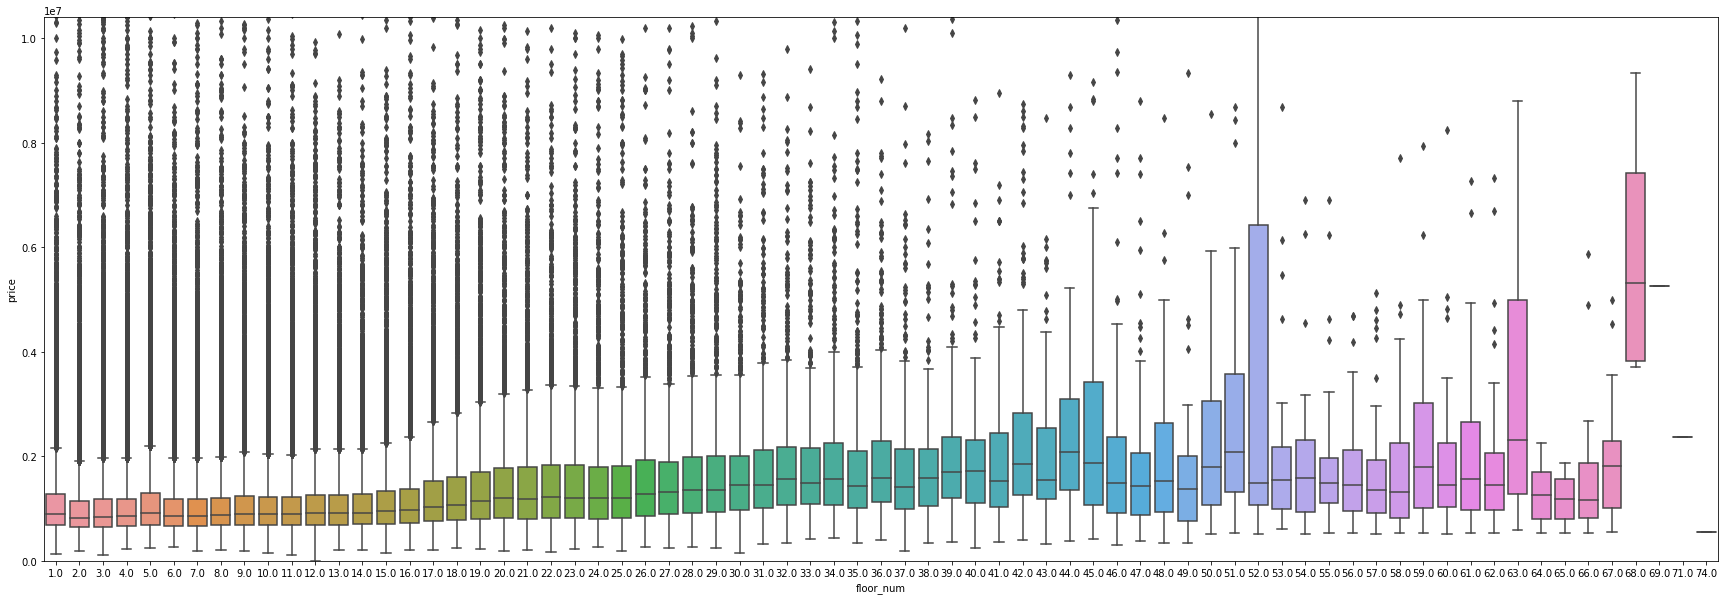

In [229]:
var = 'floor_num'
data = pd.concat([train_data_pri['price'], train_data_pri[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=10400000);
plt.show()

In [230]:
test_data_pri.floor_num.describe()

count    3401.000000
mean        9.045575
std         8.008414
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        68.000000
Name: floor_num, dtype: float64

In [231]:
train_data_pri.floor_num = np.where(train_data_pri['floor_num'].isnull(),12,train_data_pri['floor_num'])

In [234]:
print len(train_data_pri.project_name.unique())
print len(test_data_pri.project_name.unique())

3523
1234


In [235]:
train_data_pri.head(10)

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
0,EUPHONY GARDENS,5 Jalan Mata Ayer #01-25,95,Strata,600000,01-Jan-2010,Condominium,99 Yrs From 25/02/1998,2001,Resale,27,75,759151,North Region,Mandai,2010-1,1.424622,103.824894,1.0,25.0
1,THE SHORE RESIDENCES,81 Amber Road #16-06,83,Strata,1109618,01-Jan-2010,Condominium,103 Yrs From 18/08/2009,Uncompleted,New Sale,15,43,439893,Central Region,Marine Parade,2010-1,1.302808,103.900986,16.0,6.0
2,CARIBBEAN AT KEPPEL BAY,42 Keppel Bay Drive #01-111,138,Strata,1909000,02-Jan-2010,Condominium,99 Yrs From 16/08/1999,2004,Resale,4,9,98656,Central Region,Bukit Merah,2010-1,1.266812,103.814504,1.0,111.0
3,ONE AMBER,9 Amber Gardens #19-23,89,Strata,1197500,02-Jan-2010,Condominium,Freehold,Uncompleted,Sub Sale,15,43,439958,Central Region,Marine Parade,2010-1,1.301490,103.898675,19.0,23.0
4,AMARANDA GARDENS,118 Serangoon Avenue 3 #07-12,108,Strata,1150000,03-Jan-2010,Condominium,Freehold,2004,Resale,19,55,554773,North East Region,Serangoon,2010-1,1.349432,103.866990,7.0,12.0
5,ASTOR GREEN,7 Pine Grove #10-01,99,Strata,890000,03-Jan-2010,Condominium,99 Yrs From 18/11/1991,1995,Resale,21,59,597592,Central Region,Bukit Timah,2010-1,1.318447,103.776723,10.0,1.0
6,THE SHORE RESIDENCES,81 Amber Road #20-01,83,Strata,1239200,03-Jan-2010,Condominium,103 Yrs From 18/08/2009,Uncompleted,New Sale,15,43,439893,Central Region,Marine Parade,2010-1,1.302808,103.900986,20.0,1.0
7,ORCHID PARK CONDOMINIUM,81 Yishun Street 81 #06-01,111,Strata,700000,03-Jan-2010,Condominium,99 Yrs From 01/09/1991,1994,Resale,27,76,768445,North Region,Yishun,2010-1,1.413414,103.835270,6.0,1.0
8,N.A.,1 Evergreen Avenue,392,Land,2650000,04-Jan-2010,Semi-Detached House,Freehold,Unknown,Resale,16,46,468917,East Region,Bedok,2010-1,1.314909,103.935337,12.0,NaN
9,NEWTON ONE,1 Newton Road #15-03,113,Strata,2103680,04-Jan-2010,Condominium,Freehold,2009,Sub Sale,11,30,307943,Central Region,Novena,2010-1,1.314090,103.839434,15.0,3.0


In [236]:
t = train_data_pri.project_name.unique()
t1 = test_data_pri.project_name.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
name_dict={}
for i in range(len(t)):
    name_dict[t[i]] = i+1
#print block_dict

train_data_pri['project_name'] = train_data_pri.project_name.apply(lambda x : name_dict[x])
test_data_pri['project_name'] = test_data_pri.project_name.apply(lambda x : name_dict[x])

3526 1234
['# 1 LOFT' '# 1 SUITES' '1 CANBERRA' ..., 'ZENITH' 'ZEPHYR PARK'
 'ZHEN JI GARDEN'] ["D'LEEDON" 'MERGUI MANSIONS' 'MIMOSA PARK' ..., 'PINNACLE 16'
 'BALMORAL POINT' 'STUDIO 3']


In [237]:
print len(train_data_pri.address.unique())
print len(test_data_pri.address.unique())

311913
4033


In [238]:
print train_data_pri.shape
train_data_pri= train_data_pri.drop(train_data_pri[train_data_pri.address == 'n'].index)
print train_data_pri.shape

(457300, 20)
(457299, 20)


In [239]:
##t = train_data_pri.address.unique()
##t1 = test_data_pri.address.unique()
#t = t + t1
##t = np.append(t,t1)
#t = t.unique()
##t = np.unique(t)
##t.sort()
##print len(t),len(t1)
##print t,t1
##address_dict={}
##for i in range(len(t)):
    ##address_dict[t[i]] = i+1
#print block_dict

##train_data_pri['address'] = train_data_pri.address.apply(lambda x : address_dict[x])
##test_data_pri['address'] = test_data_pri.address.apply(lambda x : address_dict[x])

In [240]:
t = train_data_pri.type_of_land.unique()
t1 = test_data_pri.type_of_land.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
landtype_dict={}
for i in range(len(t)):
    landtype_dict[t[i]] = i+1
#print block_dict

train_data_pri['type_of_land'] = train_data_pri.type_of_land.apply(lambda x : landtype_dict[x])
test_data_pri['type_of_land'] = test_data_pri.type_of_land.apply(lambda x : landtype_dict[x])

3 2
['Land' 'Strata' 'Unknown'] ['Strata' 'Land']


In [241]:
train_data_pri.contract_date = train_data_pri.contract_date.apply(lambda x : x.replace("-",""))
test_data_pri.contract_date = test_data_pri.contract_date.apply(lambda x : x.replace("-",""))
print train_data_pri.contract_date.unique()
print test_data_pri.contract_date.unique()

t = train_data_pri.contract_date.unique()
t1 = test_data_pri.contract_date.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
contract_dict={}
for i in range(len(t)):
    contract_dict[t[i]] = i+1
#print block_dict

train_data_pri['contract_date'] = train_data_pri.contract_date.apply(lambda x : contract_dict[x])
test_data_pri['contract_date'] = test_data_pri.contract_date.apply(lambda x : contract_dict[x])


['01Jan2010' '02Jan2010' '03Jan2010' ..., '3Aug2017' '2Aug2017' '1Aug2017']
['29Sep2017' '28Sep2017' '27Sep2017' '26Sep2017' '25Sep2017' '22Sep2017'
 '21Sep2017' '20Sep2017' '19Sep2017' '18Sep2017' '15Sep2017' '14Sep2017'
 '13Sep2017' '12Sep2017' '11Sep2017' '8Sep2017' '7Sep2017' '6Sep2017'
 '5Sep2017' '4Sep2017' '08SEP2017' '07SEP2017' '06SEP2017' '05SEP2017'
 '04SEP2017' '22SEP2017' '21SEP2017' '20SEP2017' '19SEP2017' '18SEP2017'
 '15SEP2017' '14SEP2017' '13SEP2017' '12SEP2017' '11SEP2017' '09SEP2017'
 '05OCT2017' '04OCT2017' '03OCT2017' '02OCT2017' '29SEP2017' '28SEP2017'
 '27SEP2017' '26SEP2017' '25SEP2017' '23SEP2017' '19OCT2017' '18OCT2017'
 '17OCT2017' '16OCT2017' '13OCT2017' '12OCT2017' '11OCT2017' '10OCT2017'
 '09OCT2017' '06OCT2017' '01NOV2017' '31OCT2017' '30OCT2017' '29OCT2017'
 '28OCT2017' '27OCT2017' '26OCT2017' '25OCT2017' '24OCT2017' '23OCT2017'
 '22OCT2017' '21OCT2017' '20OCT2017' '11NOV2017' '10NOV2017' '09NOV2017'
 '08NOV2017' '07NOV2017' '06NOV2017' '03NOV2017' '02N

In [242]:
t = train_data_pri.property_type.unique()
t1 = test_data_pri.property_type.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
proptype_dict={}
for i in range(len(t)):
    proptype_dict[t[i]] = i+1
#print block_dict

train_data_pri['property_type'] = train_data_pri.property_type.apply(lambda x : proptype_dict[x])
test_data_pri['property_type'] = test_data_pri.property_type.apply(lambda x : proptype_dict[x])

6 6
['Apartment' 'Condominium' 'Detached House' 'Executive Condominium'
 'Semi-Detached House' 'Terrace House'] ['Condominium' 'Apartment' 'Terrace House' 'Semi-Detached House'
 'Detached House' 'Executive Condominium']


In [243]:
t = train_data_pri.type_of_sale.unique()
t1 = test_data_pri.type_of_sale.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
typesale_dict={}
for i in range(len(t)):
    typesale_dict[t[i]] = i+1
#print block_dict

train_data_pri['type_of_sale'] = train_data_pri.type_of_sale.apply(lambda x : typesale_dict[x])
test_data_pri['type_of_sale'] = test_data_pri.type_of_sale.apply(lambda x : typesale_dict[x])

3 1
['New Sale' 'Resale' 'Sub Sale'] ['Resale']


In [244]:
train_data_pri.month = train_data_pri.month.apply(lambda x : x.replace("-",""))
test_data_pri.month = test_data_pri.month.apply(lambda x : x.replace("-",""))
print train_data_pri.month.unique()
print test_data_pri.month.unique()

t = train_data_pri.month.unique()
t1 = test_data_pri.month.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
month_dict={}
for i in range(len(t)):
    month_dict[t[i]] = i+1
#print block_dict

train_data_pri['month'] = train_data_pri.month.apply(lambda x : month_dict[x])
test_data_pri['month'] = test_data_pri.month.apply(lambda x : month_dict[x])

['20101' '20102' '20103' '20104' '20105' '20106' '20107' '20108' '20109'
 '201010' '201011' '201012' '20111' '20112' '20113' '20114' '20115' '20116'
 '20117' '20118' '20119' '201110' '201111' '201112' '20121' '20122' '20123'
 '20124' '20125' '20126' '20127' '20128' '20129' '201210' '201211' '201212'
 '20131' '20132' '20133' '20134' '20135' '20136' '20137' '20138' '20139'
 '201310' '201311' '201312' '20141' '20142' '20143' '20144' '20145' '20146'
 '20147' '20148' '20149' '201410' '201411' '201412' '20151' '20152' '20153'
 '20154' '20155' '20156' '20157' '20158' '20159' '201510' '201511' '201512'
 '20161' '20162' '20163' '20164' '20165' '20166' '20167' '20168' '20169'
 '201610' '201611' '201612' '20171' '20172' '20173' '20174' '19951' '19952'
 '19953' '19954' '19955' '19956' '19957' '19958' '19959' '199510' '199511'
 '199512' '19961' '19962' '19963' '19964' '19965' '19966' '19967' '19968'
 '19969' '199610' '199611' '199612' '19971' '19972' '19973' '19974' '19975'
 '19976' '19977' '19978'

In [245]:
def count_remaining_years(row):
    current_year = datetime.today().year
    tenure_years = int(row["tenure_year"])
    tenure_start = row["tenure_start_date"].year
    tenure_end = row["tenure_start_date"].year + tenure_years
    tenure_remain =  tenure_end - current_year
    return tenure_remain

In [246]:
blocks_streets_units = train_data_pri.address.str.split("#")
blocks_streets = blocks_streets_units.str.get(0)
splitted_blocks_streets = blocks_streets.str.split(" ", 1)
blocks = splitted_blocks_streets.str.get(0)
streets = splitted_blocks_streets.str.get(1)
train_data_pri["address_block"] = blocks
train_data_pri["address_street"] = streets 

In [247]:
train_data_pri.address.head(100)

0                5 Jalan Mata Ayer  #01-25 
1                    81 Amber Road  #16-06 
2             42 Keppel Bay Drive  #01-111 
3                  9 Amber Gardens  #19-23 
4           118 Serangoon Avenue 3  #07-12 
5                     7 Pine Grove  #10-01 
6                    81 Amber Road  #20-01 
7              81 Yishun Street 81  #06-01 
8                       1 Evergreen Avenue 
9                    1 Newton Road  #15-03 
10                    1 Park Road  #12-761 
11                1 Simei Street 4  #07-08 
12                     10 Ava Road  #08-05 
13                10 Gopeng Street  #27-08 
14               10 Kitchener Link  #14-18 
15        101 Lorong L Telok Kurau  #01-01 
16                 107 Ceylon Road  #05-02 
17                        109 Jalan Pintau 
18              12 Derbyshire Road  #04-05 
19             12 Keppel Bay Drive  #10-13 
20                   122 Owen Road  #02-02 
21                   127 Hillview Crescent 
22             138 Hillview Aven

In [248]:
train_data_pri.address_block.unique()

array(['5', '81', '42', ..., '121J', '15B/15C', '828'], dtype=object)

In [249]:
train_data_pri.address_street.unique()

array(['Jalan Mata Ayer  ', 'Amber Road  ', 'Keppel Bay Drive  ', ...,
       'Hua Guan Crescent  ', 'Sandy Lane  ', 'Bukit Batok Street 41  '], dtype=object)

In [250]:
blocks_streets_units = test_data_pri.address.str.split("#")
blocks_streets = blocks_streets_units.str.get(0)
splitted_blocks_streets = blocks_streets.str.split(" ", 1)
blocks = splitted_blocks_streets.str.get(0)
streets = splitted_blocks_streets.str.get(1)
test_data_pri["address_block"] = blocks
test_data_pri["address_street"] = streets

In [252]:
test_data_pri.address_street.unique()

array(['Leedon Heights  ', 'Mergui Road  ', 'Mimosa Road  ',
       'Pasir Ris Grove  ', 'River Valley Road  ', 'Serangoon Avenue 3  ',
       'Springside Avenue ', 'Tanjong Rhu Road  ', 'Tavistock Avenue ',
       'Upper Serangoon Crescent  ', 'Woodgrove Drive  ',
       'Balmoral Road  ', 'Bayshore Road  ', 'Bishan Street 25  ',
       'Bukit Timah Road  ', 'Dover Rise  ', 'Duchess Avenue  ',
       'Dunearn Road  ', 'Flora Drive  ', 'Geylang Road  ',
       'Hougang Street 92  ', 'Jalan Krian ', 'Joo Chiat Place ',
       'Keppel Bay Drive  ', 'Kovan Road  ', 'Keppel Bay View  ',
       'Kim Yam Road  ', 'Lorong Marican ', 'Mandalay Road  ',
       'Pasir Ris Link  ', 'Peck Hay Road  ',
       'Ponggol Twenty-Fourth Avenue ', 'Robertson Quay  ',
       'Siglap Road  ', 'Tampines Avenue 1  ', 'Telok Blangah Road  ',
       'Thomson Road  ', 'Trevose Crescent  ', 'Whampoa East ',
       'Woo Mon Chew Road ', 'Amber Gardens  ', 'Amber Road  ',
       'Ang Mo Kio Avenue 8  ', 'Bishan St

In [254]:
train_data_pri['completion_date'] = train_data_pri.completion_date.apply(lambda x : x.split("/")[2] if "/" in x else x )

t = train_data_pri.completion_date.unique()
t1 = test_data_pri.completion_date.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
completion_dict={}
for i in range(len(t)):
    completion_dict[t[i]] = i+1
#print block_dict

train_data_pri['completion_date'] = train_data_pri.completion_date.apply(lambda x : completion_dict[x])
test_data_pri['completion_date'] = test_data_pri.completion_date.apply(lambda x : completion_dict[x])

84 64
['1927' '1929' '1930' '1931' '1932' '1934' '1937' '1938' '1939' '1940'
 '1941' '1948' '1949' '1950' '1951' '1952' '1953' '1954' '1955' '1956'
 '1957' '1958' '1959' '1960' '1961' '1962' '1963' '1964' '1965' '1966'
 '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976'
 '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986'
 '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996'
 '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006'
 '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' 'Uncomplete' 'Uncompleted' 'Unknown'] ['2014' '1995' '1979' '2015' '2016' '1992' '1998' '1986' '2011' '2010'
 '2000' '2012' '2001' '1999' '1968' '2004' '2006' 'Unknown' '2005' '2009'
 '1975' '2013' '1996' '1997' '1991' '1994' '2002' '1982' '2008' '2007'
 '1987' '1978' '1983' '1984' '1972' '1990' '1993' '1971' '2003' '1969'
 '1985' '1989' '2017' '1980' '1976' '1956' '1988' '1967' '1958' '1957'
 '1955' '1977' '1960' 

In [255]:
t = train_data_pri.address_block.unique()
t1 = test_data_pri.address_block.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_block_dict={}
for i in range(len(t)):
    address_block_dict[t[i]] = i+1
#print block_dict

train_data_pri['address_block'] = train_data_pri.address_block.apply(lambda x : address_block_dict[x])
test_data_pri['address_block'] = test_data_pri.address_block.apply(lambda x : address_block_dict[x])

3434 572
['01' '02' '03' ..., 'Yio' 'Yong' 'Yunnan'] ['11' '81' '43' '115' '469' '135' '204' '3' '39A' '10' '1A' '66' '2' '941'
 '6' '50' '966' '538' '12' '355' '5' '46' '1' '19' '42' '21' '14' '78' '75'
 '17' '92' '138' '87' '120' '181' '68' '376' '42A' '9' '59' '7' '40' '20'
 '47' '210' '222' '97A' '33' '57' '132A' '51' '22B' '103A' '65' '8' '253A'
 '206' '165' '49' '130' '8D' '101' '53' '11A' '700' '27B' '285' '83' '26A'
 '884' '26' '128' '32G' '201' '29' '995' '48' '985' '52' '140' '37' '34'
 '295' '172' '151' '121' '333' '99' '25A' '221' '30' '124' '357' '507' '22'
 '50E' '23' '38' '73' '18' '69' '60' '4' '41' '552' '103' '187' '152' '11D'
 '77' '503' '91' '64' '28' '261' '967' '79' '90' '39' '200' '1C' '38A' '61'
 '156' '708' '461A' '93' '132' '214' '224' '113' '29A' '31' '460' '25'
 '208' '95' '158' '97' '119' '150' '245' '144' '202' '81B' '116' '2D' '27'
 '25C' '85' '30A' '331' '15' '520' '76' '281' '1001' '55B' '45' '263' '18A'
 '105' '190' '149' '117' '495' '356' '11F' '143' 

In [256]:
t = train_data_pri.address_street.unique()
t1 = test_data_pri.address_street.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_street_dict={}
for i in range(len(t)):
    address_street_dict[t[i]] = i+1
#print block_dict

train_data_pri['address_street'] = train_data_pri.address_street.apply(lambda x : address_street_dict[x])
test_data_pri['address_street'] = test_data_pri.address_street.apply(lambda x : address_street_dict[x])

3412 965
[' Tavistock Avenue ' '(ENBLOC) Robin Drive ' '(PLOT 1) Jalan Ishak ' ...,
 'Zion Close ' 'Zion Close  ' 'Zion Road  '] ['Leedon Heights  ' 'Mergui Road  ' 'Mimosa Road  ' 'Pasir Ris Grove  '
 'River Valley Road  ' 'Serangoon Avenue 3  ' 'Springside Avenue '
 'Tanjong Rhu Road  ' 'Tavistock Avenue ' 'Upper Serangoon Crescent  '
 'Woodgrove Drive  ' 'Balmoral Road  ' 'Bayshore Road  '
 'Bishan Street 25  ' 'Bukit Timah Road  ' 'Dover Rise  '
 'Duchess Avenue  ' 'Dunearn Road  ' 'Flora Drive  ' 'Geylang Road  '
 'Hougang Street 92  ' 'Jalan Krian ' 'Joo Chiat Place '
 'Keppel Bay Drive  ' 'Kovan Road  ' 'Keppel Bay View  ' 'Kim Yam Road  '
 'Lorong Marican ' 'Mandalay Road  ' 'Pasir Ris Link  ' 'Peck Hay Road  '
 'Ponggol Twenty-Fourth Avenue ' 'Robertson Quay  ' 'Siglap Road  '
 'Tampines Avenue 1  ' 'Telok Blangah Road  ' 'Thomson Road  '
 'Trevose Crescent  ' 'Whampoa East ' 'Woo Mon Chew Road '
 'Amber Gardens  ' 'Amber Road  ' 'Ang Mo Kio Avenue 8  '
 'Bishan Street 15  ' '

In [257]:
train_data_pri.tenure = train_data_pri.tenure.str.strip()
train_data_pri.tenure = train_data_pri.tenure.apply(lambda x : x.split(" ")[0] if "Y" in x else x )
train_data_pri.tenure =  train_data_pri.tenure.apply(lambda x : 'Freehold' if x == 'Freehols' else x )

In [258]:
test_data_pri.tenure = test_data_pri.tenure.str.strip()
test_data_pri.tenure = test_data_pri.tenure.apply(lambda x : x.split(" ")[0] if "Y" in x else x )
test_data_pri.tenure =  test_data_pri.tenure.apply(lambda x : 'Freehold' if x == 'Freehols' else x )

In [259]:
train_data_pri.tenure.unique()

array(['99', '103', 'Freehold', '999', '929', '9999', '956', '101', '947',
       '100', '946', '999999', '89', '60', '102', '70', '937', '945',
       '940', '998', '85', '993', '953', '199', '104', 'N.A.', '92'], dtype=object)

In [260]:
test_data_pri.tenure.unique()

array(['99', 'Freehold', '999', '103', '956', '946', '9999', '929', '102',
       '85', '947', '998'], dtype=object)

In [261]:
t = train_data_pri.tenure.unique()
t1 = test_data_pri.tenure.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
tenure_dict={}
for i in range(len(t)):
    tenure_dict[t[i]] = i+1
#print block_dict

train_data_pri['tenure'] = train_data_pri.tenure.apply(lambda x : tenure_dict[x])
test_data_pri['tenure'] = test_data_pri.tenure.apply(lambda x : tenure_dict[x])

27 12
['100' '101' '102' '103' '104' '199' '60' '70' '85' '89' '92' '929' '937'
 '940' '945' '946' '947' '953' '956' '99' '993' '998' '999' '9999' '999999'
 'Freehold' 'N.A.'] ['99' 'Freehold' '999' '103' '956' '946' '9999' '929' '102' '85' '947'
 '998']


In [262]:
t = train_data_pri.area.unique()
t1 = test_data_pri.area.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
area_dict={}
for i in range(len(t)):
    area_dict[t[i]] = i+1
#print block_dict

train_data_pri['area'] = train_data_pri.area.apply(lambda x : area_dict[x])
test_data_pri['area'] = test_data_pri.area.apply(lambda x : area_dict[x])

40 38
['Ang Mo Kio' 'Bedok' 'Bishan' 'Bukit Batok' 'Bukit Merah' 'Bukit Panjang'
 'Bukit Timah' 'Changi  ' 'Choa Chu Kang' 'Clementi' 'Downtown Core'
 'Geylang' 'Hougang' 'Jurong East' 'Jurong West' 'Kallang' 'Mandai'
 'Marine Parade' 'Museum' 'Newton' 'Novena' 'Orchard' 'Outram' 'Pasir Ris'
 'Paya Lebar' 'Punggol' 'Queenstown' 'River Valley' 'Rochor' 'Sembawang'
 'Sengkang' 'Serangoon' 'Singapore River' 'Southern Islands' 'Sungei Kadut'
 'Tampines' 'Tanglin' 'Toa Payoh' 'Woodlands' 'Yishun'] ['Bukit Timah' 'Kallang' 'Serangoon' 'Pasir Ris' 'Tanglin' 'Yishun'
 'Hougang' 'Woodlands' 'Bedok' 'Bishan' 'Queenstown' 'Geylang'
 'Bukit Merah' 'River Valley' 'Novena' 'Newton' 'Punggol' 'Singapore River'
 'Tampines' 'Marine Parade' 'Ang Mo Kio' 'Choa Chu Kang' 'Bukit Batok'
 'Museum' 'Sembawang' 'Downtown Core' 'Jurong East' 'Toa Payoh' 'Rochor'
 'Southern Islands' 'Bukit Panjang' 'Sengkang' 'Clementi' 'Jurong West'
 'Outram' 'Orchard' 'Mandai' 'Changi  ']


In [263]:
t = train_data_pri.postal_code.unique()
t1 = test_data_pri.postal_code.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
postal_dict={}
for i in range(len(t)):
    postal_dict[t[i]] = i+1
#print block_dict

train_data_pri['postal_code'] = train_data_pri.postal_code.apply(lambda x : postal_dict[x])
test_data_pri['postal_code'] = test_data_pri.postal_code.apply(lambda x : postal_dict[x])

46538 2516
[     0  18965  18978 ..., 829754 829755 829756] [267955 219057 808005 ..., 248196 545040 588996]


In [264]:
t = train_data_pri.region.unique()
t1 = test_data_pri.region.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
region_dict={}
for i in range(len(t)):
    region_dict[t[i]] = i+1
#print block_dict

train_data_pri['region'] = train_data_pri.region.apply(lambda x : region_dict[x])
test_data_pri['region'] = test_data_pri.region.apply(lambda x : region_dict[x])

5 5
['Central Region' 'East Region' 'North East Region' 'North Region'
 'West Region'] ['Central Region' 'North East Region' 'East Region' 'North Region'
 'West Region']


In [265]:
t = train_data_pri.latitude.unique()
t1 = test_data_pri.latitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
lat_dict={}
for i in range(len(t)):
    lat_dict[t[i]] = i+1
#print block_dict

train_data_pri['latitude'] = train_data_pri.latitude.apply(lambda x : lat_dict[x])
test_data_pri['latitude'] = test_data_pri.latitude.apply(lambda x : lat_dict[x])

45645 2423
[  1.23819087   1.23847093   1.23860933 ...,   1.46210218  11.0388713
  52.161093  ] [ 1.31621028  1.31717013  1.3833584  ...,  1.29571275  1.38021727
  1.33863165]


In [266]:
t = train_data_pri.longitude.unique()
t1 = test_data_pri.longitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
long_dict={}
for i in range(len(t)):
    long_dict[t[i]] = i+1
#print block_dict

train_data_pri['longitude'] = train_data_pri.longitude.apply(lambda x : long_dict[x])
test_data_pri['longitude'] = test_data_pri.longitude.apply(lambda x : long_dict[x])

45062 2343
[   0.125243     76.9720471   103.68936275 ...,  103.97605745  103.97610649
  103.9761472 ] [ 103.80438833  103.85168183  103.86245702 ...,  103.8275808   103.89985746
  103.77858543]


In [267]:
train_data_pri.head()

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,...,postal_code,region,area,month,latitude,longitude,floor_num,unit_num,address_block,address_street
0,910,5 Jalan Mata Ayer #01-25,95,2,600000,29,2,20,65,2,...,41058,4,17,181,44472,12711,1.0,25.0,2216,1643
1,3112,81 Amber Road #16-06,83,2,1109618,29,2,4,83,1,...,17438,1,18,181,2616,33972,16.0,6.0,3033,626
2,379,42 Keppel Bay Drive #01-111,138,2,1909000,110,2,20,68,2,...,364,1,5,181,250,10956,1.0,111.0,1948,1909
3,1959,9 Amber Gardens #19-23,89,2,1197500,110,2,26,83,3,...,17476,1,18,181,2358,33550,19.0,23.0,3198,624
4,79,118 Serangoon Avenue 3 #07-12,108,2,1150000,189,2,26,68,2,...,29918,3,32,181,26382,24124,7.0,12.0,207,2819


In [268]:
test_data_pri.head()

,project_name,address,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,...,postal_code,region,area,month,latitude,longitude,floor_num,unit_num,address_block,address_street
0,680,11 Leedon Heights #06-31,92,2,5998,2,20,78,2,10,...,5071,1,7,275,9978,9326,6.0,31.0,143,1984
1,1779,81 Mergui Road #03-02,129,2,5998,1,26,59,2,8,...,2349,1,16,275,10658,20064,3.0,2.0,3033,2347
2,1798,43 Mimosa Road #03-49,176,2,5998,2,26,43,2,28,...,45622,3,32,275,39754,22157,3.0,49.0,1982,2380
3,3055,115 Pasir Ris Grove #03-42,46,2,5998,2,20,79,2,18,...,24485,2,24,275,35549,41194,3.0,42.0,188,2562
4,2362,469 River Valley Road #07-30,120,2,5998,2,23,79,2,10,...,3272,1,37,275,1338,13678,7.0,30.0,2105,2712


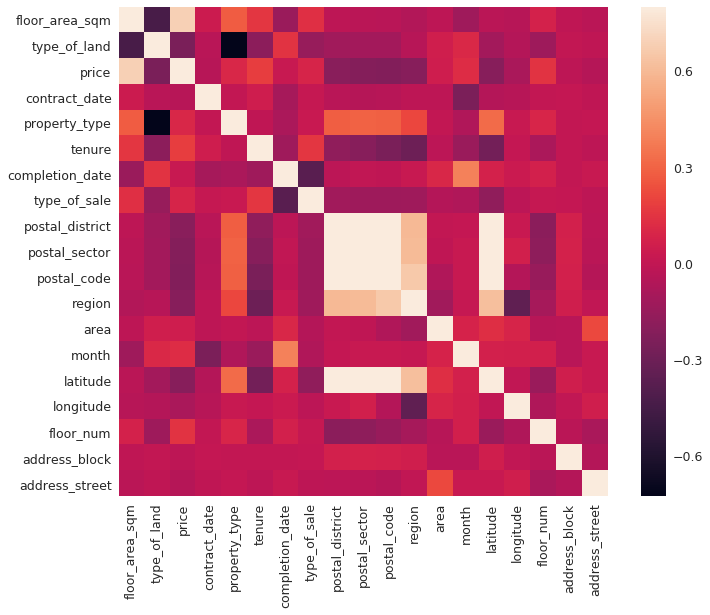

In [277]:
corrmat = train_data_pri.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

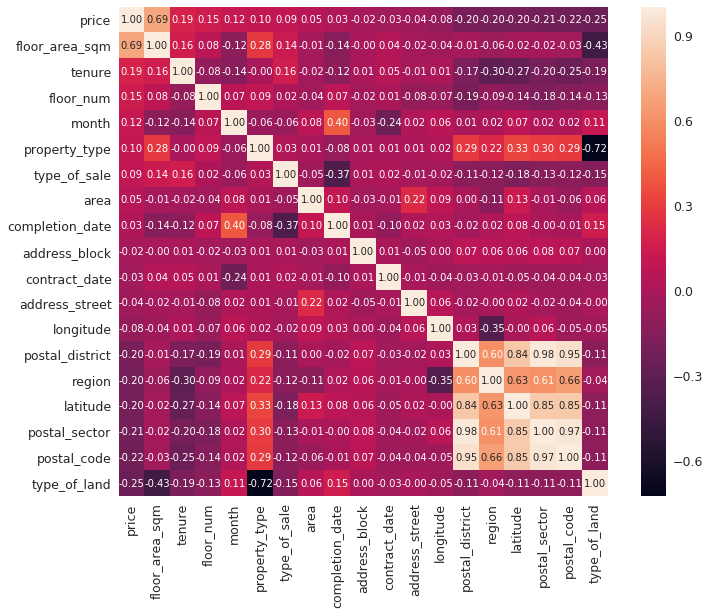

In [278]:
cols = corrmat.nlargest(20, 'price')['price'].index
cm = np.corrcoef(train_data_pri[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [279]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,price
1,floor_area_sqm
2,tenure
3,floor_num
4,month
5,property_type
6,type_of_sale
7,area
8,completion_date
9,address_block


In [275]:
train_data_pri = train_data_pri.drop(['unit_num'],axis=1)
train_data_pri = train_data_pri.drop(['address'],axis=1)
train_data_pri = train_data_pri.drop(['project_name'],axis=1)
train_data_pri.head()

,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
0,95,2,600000,29,2,20,65,2,27,75,41058,4,17,181,44472,12711,1.0,2216,1643
1,83,2,1109618,29,2,4,83,1,15,43,17438,1,18,181,2616,33972,16.0,3033,626
2,138,2,1909000,110,2,20,68,2,4,9,364,1,5,181,250,10956,1.0,1948,1909
3,89,2,1197500,110,2,26,83,3,15,43,17476,1,18,181,2358,33550,19.0,3198,624
4,108,2,1150000,189,2,26,68,2,19,55,29918,3,32,181,26382,24124,7.0,207,2819


In [282]:
trainY = train_data_pri.price.values
print trainY
train_data_pri = train_data_pri.drop(['price'],axis=1)
train_data_pri.head()

[ 600000 1109618 1909000 ...,  790000 1760000  733000]


,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
0,95,2,29,2,20,65,2,27,75,41058,4,17,181,44472,12711,1.0,2216,1643
1,83,2,29,2,4,83,1,15,43,17438,1,18,181,2616,33972,16.0,3033,626
2,138,2,110,2,20,68,2,4,9,364,1,5,181,250,10956,1.0,1948,1909
3,89,2,110,2,26,83,3,15,43,17476,1,18,181,2358,33550,19.0,3198,624
4,108,2,189,2,26,68,2,19,55,29918,3,32,181,26382,24124,7.0,207,2819


In [283]:
train_data_pri.shape

(457299, 18)

In [284]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [286]:
np.random.seed(13)
test_size = .1
X_train, X_test, y_train, y_test = train_test_split(train_data_pri, trainY, test_size = test_size)
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(411569, 18) (411569,) (45730, 18) (45730,)


In [293]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [294]:
def mse_cv(model):
    kfold = KFold(10, shuffle=True, random_state=13).get_n_splits(X_train.values)
    metrics= -cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kfold)
    return(metrics)

In [ ]:
print("GBoost",mse_cv(GBoost))

In [ ]:
GBoost.fit(X_train,y_train)
pred_Gboost = GBoost.predict(X_train)
np.mean(np.abs((y_train - pred_Gboost) / y_train)) * 100

In [ ]:
np.mean(np.abs((y_train - pred_Gboost) / y_train)) * 100

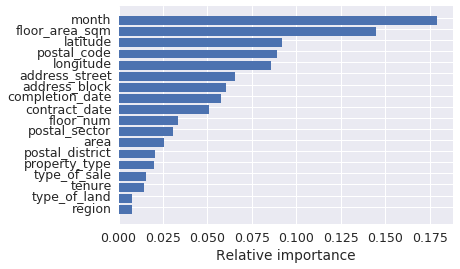

In [292]:
indices = np.argsort(GBoost.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), GBoost.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')